In [1]:
#Import bundle sampling and analysis functions
from dreimac import CircularCoords

from circle_bundles.viz.pca_viz import show_pca
from circle_bundles.viz.thumb_grids import *
from circle_bundles.viz.fiber_vis import *
from circle_bundles.viz.nerve_vis import *
from circle_bundles.viz.base_vis import *
from circle_bundles.viz.lattice_vis import *
from circle_bundles.viz.circle_vis import *


from synthetic.meshes import *
from synthetic.densities import *
from synthetic.so3_sampling import *
from synthetic.mesh_vis import *

from circle_bundles.bundle import build_bundle, attach_bundle_viz_methods
from circle_bundles.covers import MetricBallCover, TriangulationStarCover
from circle_bundles.metrics import RP1_dist2, RP2_dist, get_dist_mat
from circle_bundles.local_triv import *
from circle_bundles.triangle_cover_builders import make_rp2_cover
from circle_bundles.nerve_utils import max_trivial_to_simplex_tree
attach_bundle_viz_methods()


#For saving
folder_path = '/Users/bradturow/Desktop/Diagrams/Paper Diagrams/'

# Generate Or Load A Synthetic Dataset

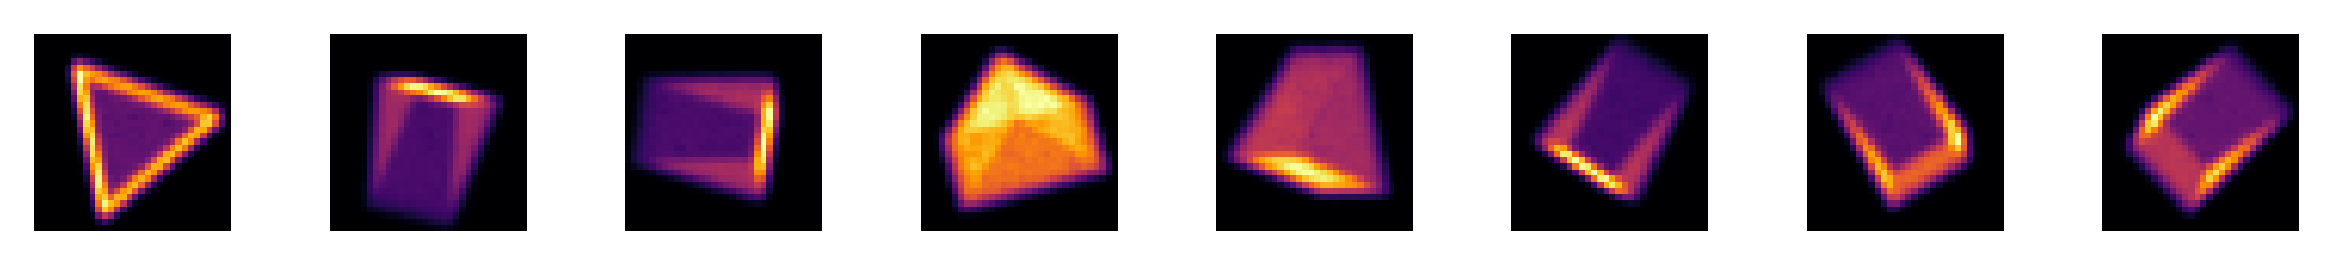

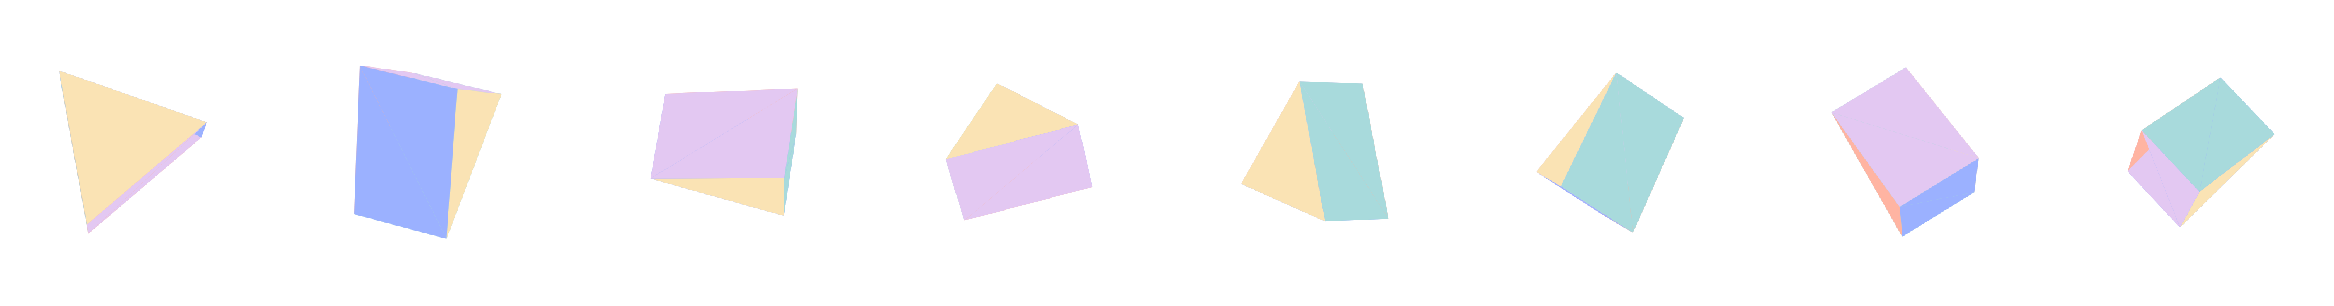

In [2]:
#Get a density
p = 3
height = 1
radius = 1
grid_size = 32

mesh, face_groups = make_tri_prism()
density = mesh_to_density(mesh, grid_size=grid_size, sigma=0.05)

vis_func = make_density_visualizer(grid_size = grid_size)
mesh_vis = make_tri_prism_visualizer(mesh, face_groups,
face_colors_list = [
    '#FFB4A2',  # Rectangular Side 2 – coral blush
    '#FAE3B4',  # Soft buttery yellow
    '#A8DADC',  # Rectangular Side 1 – seafoam
    '#E3C8F2',  # Triangle Face 1 (top)
    '#9BB1FF'   # Rectangular Side 3 – pastel periwinkle
],
                                      alpha=1.0,
                                      edge_color='black',
                                      edge_width=2.5)


#View a visualization of the mesh

#SO3_data = np.array([np.eye(3).flatten()])
n_samples = 8
SO3_data = sample_SO3(n_samples)[0]

file_name = 'prism density sample2.pdf'
save_path = folder_path + file_name
save_path = None
density_sample = rotate_density(density, SO3_data, grid_size = grid_size)
fig = show_data_vis(density_sample, vis_func, max_samples = n_samples, n_cols = n_samples, save_path = save_path, sampling_method = 'first')
plt.show()

file_name = 'prism mesh sample2.pdf'
save_path = folder_path + file_name
save_path = None
mesh_sample = get_mesh_sample(mesh, SO3_data)
fig = show_data_vis(mesh_sample, mesh_vis, max_samples = n_samples, n_cols = n_samples, save_path = save_path, sampling_method = 'first', pad_frac = 0.3)
plt.show()

In [3]:
#About 20 seconds

#Generate a dataset of random rotations
n_samples = 5000
SO3_data = sample_SO3(n_samples)[0]

mesh_data = get_mesh_sample(mesh, SO3_data)
data = rotate_density(density, SO3_data, grid_size = grid_size)

print(f'Generated {n_samples} rotated triangle meshes.')

Generated 5000 rotated triangle meshes.


In [ ]:
save_path = '/Users/bradturow/Desktop/TDA/untitled folder/tri_prism_densities.pkl'

with open(save_path, 'wb') as f:
    pickle.dump([data, mesh_data], f)

# Get and print the file size
size_bytes = os.path.getsize(save_path)
size_mb = size_bytes / (1024 * 1024)
print(f"Saved to '{save_path}' ({size_mb:.2f} MB)")


In [ ]:
#LOAD A SAVED DATASET
save_path = '/Users/bradturow/Desktop/TDA/untitled folder/tri_prism_densities.pkl'

with open(save_path, 'rb') as f:
    [data, mesh_data] = pickle.load(f)
    
print(data.shape)


In [ ]:
#Show a PCA visualization of the dataset
show_pca(data)

# Bundle Analysis

## Open Cover

### Cover And Nerve Summary
- $n_\text{sets} = 73$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 73$
- $\#(\text{1-simplices}) = 216$
- $\#(\text{2-simplices}) = 144$
- *No recorded simplices in dimensions* $\ge 3$

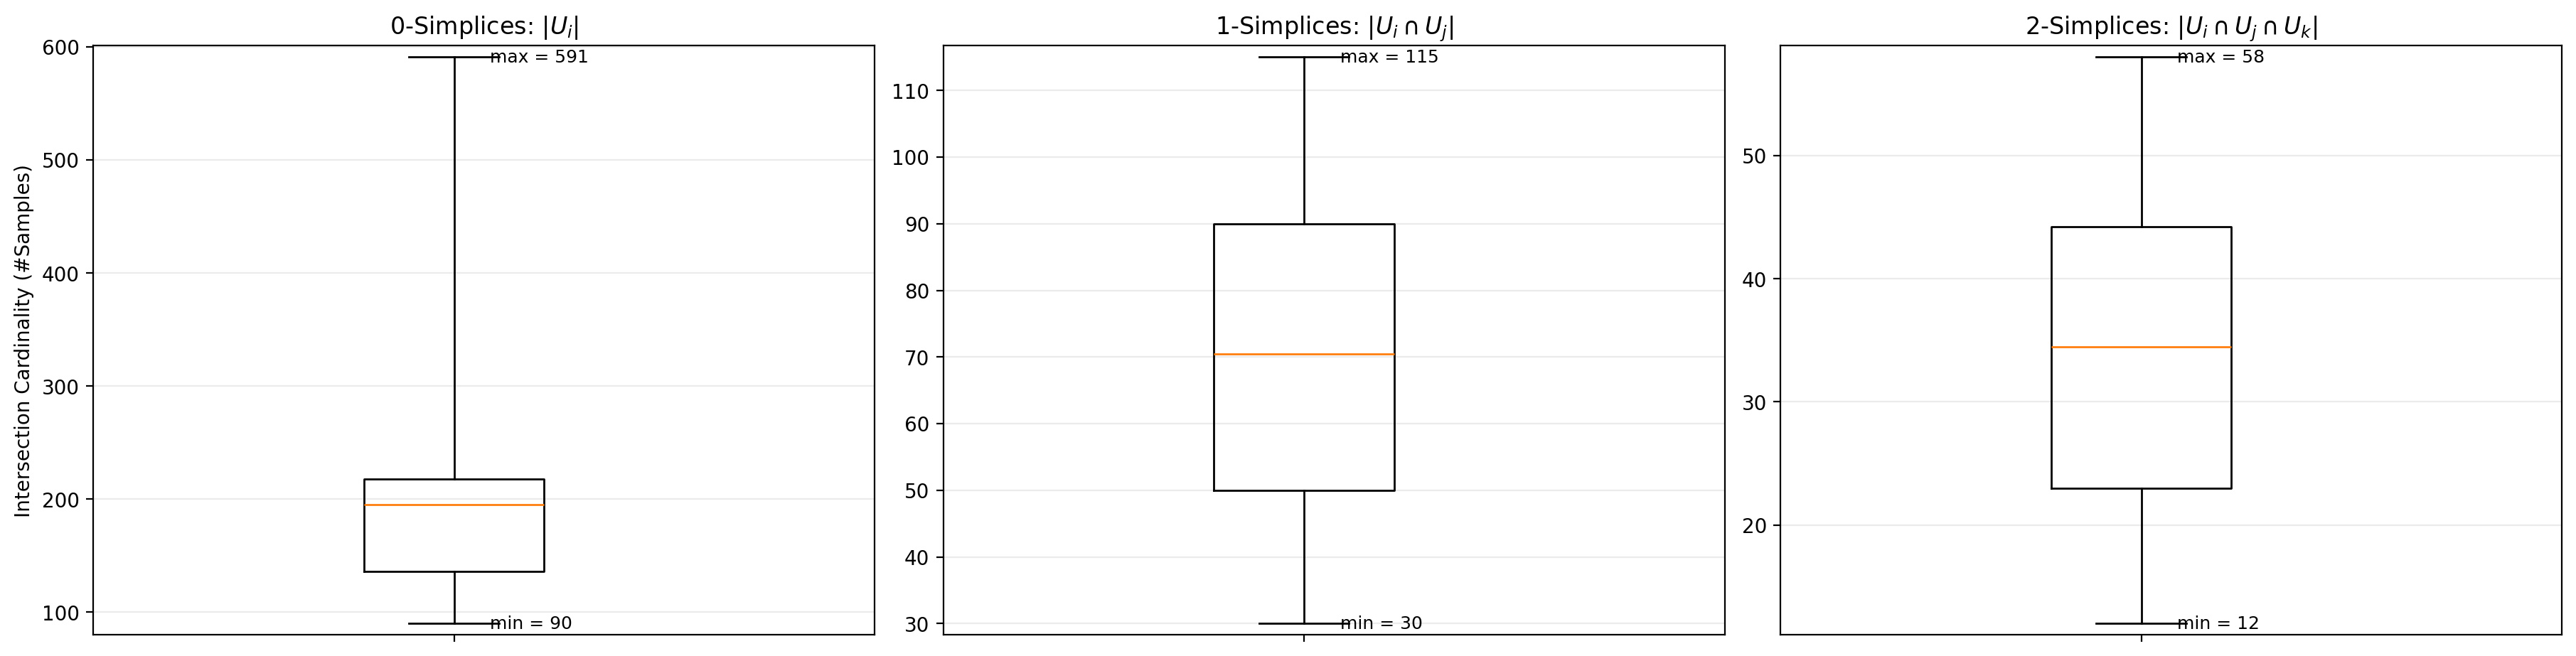

In [4]:
#Compute basepoint projections
base_points = get_density_axes(data)

#Map base points to upper half sphere for visualization
base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_sd = 2
cover = make_rp2_cover(base_points, n_sd = n_sd)

summ = cover.summarize(plot = True)

## Local Coordinates 

In [ ]:
#Try running circular coordinates on a single open set
j= 4
n_landmarks = 200
prime = 43
fiber_data = data[cover.U[j]]
patch_angles, n_warnings, n_lmks = compute_circular_coords_dreimac(fiber_data, n_landmarks_init = n_landmarks, CircularCoords_cls = CircularCoords)

print(n_warnings, n_lmks)
show_pca(fiber_data, colors = patch_angles)



In [ ]:
#Show a sample of coordinatized densities from the fiber
fig, axes = circle_vis(
    fiber_data,
    patch_angles,
    vis_func,
    per_circle=8,
    angle_range=None,      
    radius=1.0,            
    extent_factor=1.2,     
    figsize=6,
    dpi=75,
    zoom=0.13,             
    circle_linewidth=1.0,
    circle_color="black",
    save_path=None,
)

plt.show()


fiber_meshes = mesh_data[cover.U[j]]
fig, axes = circle_vis(
    fiber_meshes,
    patch_angles,
    mesh_vis,
    per_circle=8,
    angle_range=None,      
    radius=1.0,            
    extent_factor=1.2,     
    figsize=4,
    dpi=100,
    zoom=0.12,             
    circle_linewidth=1.0,
    circle_color="black",
    save_path=None,
)

plt.show()

## Characteristic Classes

In [5]:
#About 45 seconds

#Compute local trivializations and characteristic classes
bundle = build_bundle(
    data,
    cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 250,
    show=True
)


<IPython.core.display.Math object>

In [6]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)



============ Characteristic Class Persistence Summary ============
Total edges: 216 | triangles: 144 | tetrahedra: 0
SW1 cobirth:    k=0, cutoff=∞
SW1 codeath:    k=152, cutoff=0.200528
Euler cobirth:  k=0, cutoff=∞
Euler codeath:  k=1, cutoff=0.846535



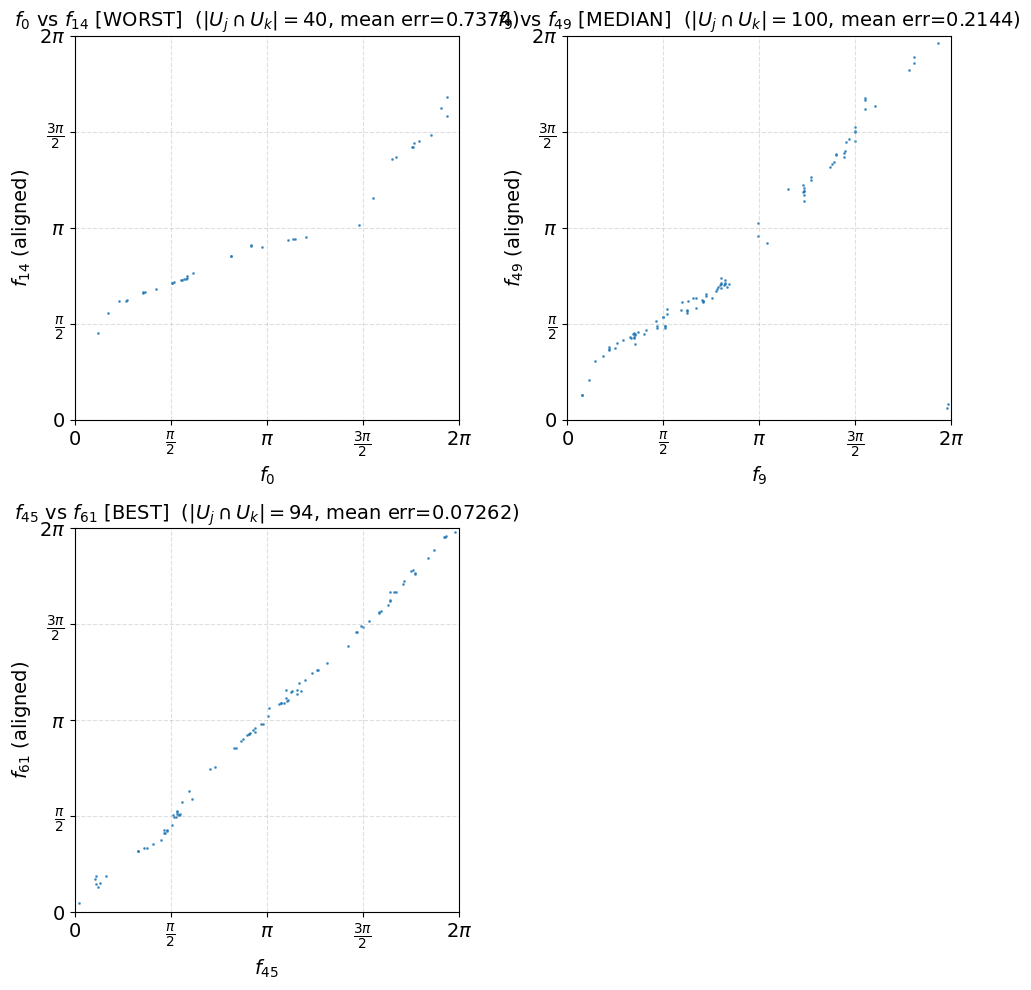

In [8]:
#Show some correlations of local circular coordinates
fig = bundle.compare_trivs(align = True)
plt.show()

In [10]:
import os
import pickle
U = cover.U
pou = cover.pou
f = bundle.local_triv.f
Omega = bundle.classes.cocycle_used.Omega


bundle_artifact = {'data':data, 
                   'base_points':cover.base_points, 
                   'Omega':Omega,
                    'f':f, 
                    'U':U,
                    'pou':pou}


save_path = '/Users/bradturow/Desktop/Circle Bundle Code/Clean_Code/data/rp2_prism_bundle_artifact.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(bundle_artifact, f)

# Get and print the file size
size_bytes = os.path.getsize(save_path)
size_mb = size_bytes / (1024 * 1024)
print(f"Saved to '{save_path}' ({size_mb:.2f} MB)")


Saved to '/Users/bradturow/Desktop/Circle Bundle Code/Clean_Code/data/rp2_prism_bundle_artifact.pkl' (1256.16 MB)


In [11]:
from circle_bundles.bundle_map import *
U = cover.U
pou = cover.pou
f = bundle.local_triv.f
Omega = bundle.classes.cocycle_used.Omega


import cProfile, pstats, io
pr = cProfile.Profile()
pr.enable()

F, pre_F, Omega_true, Phi_true, report = get_bundle_map(
    U = U,
    pou = pou,
    f = f,
    Omega = Omega,
    edges = None,
    strict_semicircle = True,
    show_summary = True)

pr.disable()
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats("cumtime")
ps.print_stats(30)
print(s.getvalue())




### Coordinatization

**Cocycle projection distance:**  $d_{\infty}(\Omega,\Pi(\Omega))= \sup_{(jk)\in\mathcal{N}(\mathcal{U})^1}\ \sup_{b\in \pi(X)\cap(U_j\cap U_k)}\ \|\Omega_{jk}(b)-\Pi(\Omega)_{jk}(b)\|_{F}$

- $\approx 0.445874$

**Witness quality:**  $\sup_{(jk)}\sup_{x:\ \pi(x)\in U_j\cap U_k}\ d_{\mathbb{S}^{1}}\!\big(f_j(x),\ \Omega_{jk}(\pi(x))f_k(x)\big)$

- $\approx 1.33792$ (radians)

**Auxiliary diagnostics:**

- Classifying-map projection distance $\approx 0.0138325$
- Frame projection distance $\approx 0.225277$

**Chart disagreement:**  $\Delta(s)=\max_{j,j'\in J_s}\|F_j(s)-F_{j'}(s)\|_2$

- max $\approx 4.29701e-15$
- p95 $\approx 1.92799e-15$
- p99 $\approx 2.57554e-15$


         3065859 function calls in 23.411 seconds

   Ordered by: cumulative time
   List reduced from 301 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   23.411   11.705 /Users/bradturow/anaconda3/envs/tda_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3543(run_code)
        2    0.000    0.000   23.411   11.705 {built-in method builtins.exec}
        1    0.046    0.046   23.411   23.411 /var/folders/y4/gvldwt2n2z94xhq_r7lmq8vw0000gn/T/ipykernel_42502/726153982.py:1(<module>)
        1    0.032    0.032   23.364   23.364 /Users/bradturow/Desktop/Circle Bundle Code/Clean_Code/circle_bundles/bundle_map.py:665(get_bundle_map)
        1    0.755    0.755   17.801   17.801 /Users/bradturow/Desktop/Circle Bundle Code/Clean_Code/circle_bundles/bundle_map.py:230(get_classifying_map)
     5000    4.038    0.001   16.818    0.003 /Users/bradturow/Desktop/Circle Bundle Code/Clean_Code/circle_

In [13]:
from circle_bundles.viz.bundle_dash import *

app = show_bundle_vis(base_points = base_points, data  = F, base_metric = RP1_dist2)
plt.show()



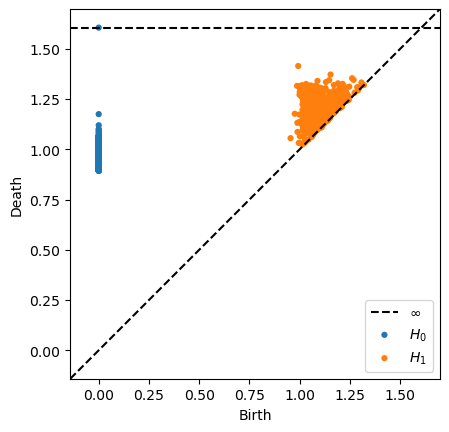

In [18]:
#Run Ripser on the dataset
from ripser import ripser
from persim import plot_diagrams
prime = 2
diagrams = ripser(F, coeff = prime, maxdim = 1, n_perm = 500)['dgms']
plot_diagrams(diagrams, show=True)    

In [22]:
import sys
sys.path.append('/Users/bradturow/PSC')

import PSC
from PSC import projections, data, utils
import inspect

print("PCA:", inspect.signature(projections.PCA))
print("manopt_alpha:", inspect.signature(projections.manopt_alpha))
print("random_point:", inspect.signature(data.random_point))
print("stiefel_point_cloud:", getattr(data, "stiefel_point_cloud", None))




PCA: (ys, n)
manopt_alpha: (ys, alpha_init, verbosity=1)
random_point: (d, k, s=1)
stiefel_point_cloud: <function stiefel_point_cloud at 0x182188ee0>


In [7]:
#Compute a global coordinatization map compatible with the maximal subcomplex
#on which the characteristic class representatives are coboundaries
triv_result = bundle.get_global_trivialization()


#Show an interactive visualization of the bundle
fig = bundle.show_bundle(get_dist_mat = get_dist_mat, colors = triv_result.F)
plt.show()

In [ ]:
#Show a PCA visualization of a fat fiber labeled with images
center_ind = 579
r = 0.2
dist_mat = get_dist_mat(base_points, metric = RP2_dist)
nearby_indices = np.where(dist_mat[center_ind] < r)[0]
fiber_data =  bundle.data[nearby_indices]
vis_data = mesh_data[nearby_indices]

#Labeled with meshes
file_name = 'Prism fiber meshes PCA.pdf'
save_path = folder_path + file_name
save_path = None
fig_fiber = fiber_vis(fiber_data, mesh_vis, vis_data = vis_data, max_images=500, zoom=0.08, figsize=(10, 8), save_path = save_path)
plt.show()

#Labeled with density projections
file_name = 'Prism fiber densities PCA.pdf'
save_path = folder_path + file_name
save_path = None
fig = fiber_vis(fiber_data, vis_func = vis_func, max_images=500, figsize=(10, 8), zoom = 0.05, save_path = save_path)
plt.show()

#Show the base projections of the sample data
file_name = 'Prism fiber base.pdf'
save_path = folder_path + file_name
save_path = None
fig_base = base_vis(base_points, center_ind, r, dist_mat, figsize=(8, 6), use_pca = False, save_path = save_path)
plt.show()



## Nerve Visualization

In [ ]:
#Get a visualization of the 1-skeleton of the nerve, labeled by the orientation cocycle representative
node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]
file_name = 'Prism Densities Nerve.pdf'
save_path = folder_path + file_name
save_path = None
fig, axes = nerve_vis(
    cover.K,
    cover.flat_vertex_coords,
    cochains={1:bundle.classes.sw1_O1},
    base_colors={0:'black', 1:'black', 2:'pink'}, 
    cochain_cmaps={1:{1: 'blue', -1:'darkred'}},
    opacity=0,
    node_size=18,
    node_labels=node_labels,
    fontsize=8,
    font_color = 'white',
    save_path=save_path,
    title=None
)
plt.show()

In [ ]:
#Show an interactive visualization of the 2-skeleton of the nerve
fig = bundle.show_nerve(show_labels = False)
plt.show()

In [ ]:
#Show a visualization of the nerve labeled with meshes

dist_mat = get_dist_mat(cover.landmarks, data2 = cover.base_points, metric = RP2_dist)
inds = np.argmin(dist_mat, axis = 1)
node_data = mesh_data[inds]

node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]
file_name = 'Prism Densities Full Nerve.pdf'
save_path = folder_path + file_name
save_path = None

fig, axes = nerve_vis(
    cover.K,
    cover.flat_vertex_coords,
    cochains={1:bundle.classes.sw1_O1},
    base_colors={0:'black', 1:'black', 2:'pink'},
    cochain_cmaps={1:{1: 'blue', -1:'darkred'}},
    opacity=0,
    node_size=24,
    line_width=1,
    node_labels=None,
    fontsize=8,
    font_color='white',
    vis_func=mesh_vis,
    data=node_data,
    image_zoom=0.07,
    save_path=save_path,
    title=None
)



In [ ]:
#Show a visualization of the nerve labeled with density projections

#Get samples to display at nodes
dist_mat = get_dist_mat(cover.landmarks, data2 = cover.base_points, metric = RP2_dist)
inds = np.argmin(dist_mat, axis = 1)
node_data = bundle.data[inds]

node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]
file_name = 'Prism Densities Full Nerve.pdf'
save_path = folder_path + file_name
save_path = None

fig, axes = nerve_vis(
    cover.K,
    cover.flat_vertex_coords,
    cochains={1:bundle.classes.sw1_O1},
    base_colors={0:'black', 1:'black', 2:'pink'},
    cochain_cmaps={1:{1: 'blue', -1:'darkred'}},
    opacity=0,
    node_size=14,
    line_width=1,
    node_labels=None,
    fontsize=8,
    font_color='white',           
    vis_func=vis_func,
    data=node_data,
    image_zoom=0.05,
    save_path=save_path,
    title=None
)
plt.show()

# Restriction To An Equator

In [ ]:
#Get patches whose projection lie near the equator in RP2
eps = 0.1
eq_inds = np.abs(base_points[:,-1]) < eps
eq_data = bundle.data[eq_inds]
eq_base_angles = np.arctan2(base_points[eq_inds,1], base_points[eq_inds,0]) % (np.pi)


In [ ]:
#Get a visualization of the data arranged by assigned coordinates using meshes
coords = np.array([eq_base_angles, triv_result.F[eq_inds]]).T
file_name = 'prism KB meshes.pdf'
save_path = folder_path + file_name
save_path = None

fig = lattice_vis(
    mesh_data[eq_inds],
    coords,
    mesh_vis, 
    per_row=7,          
    per_col=7,          
    figsize=10, 
    thumb_px=100,
    dpi=200,
    save_path=None
)
plt.show()

#Get a visualization of the data arranged by assigned coordinates using meshes
file_name = 'prism KB densities.pdf'
save_path = folder_path + file_name
save_path = None

fig = lattice_vis(
    eq_data,
    coords,
    vis_func, 
    per_row=7,          
    per_col=7,          
    figsize=12, 
    thumb_px=150,
    dpi=200,
    save_path=None
)
plt.show()


In [ ]:
#Show a visualization of the maximal subcomplex of N(U) on which the class representatives become coboundaries
file_name = 'Prism Density Restricted Nerve.pdf'
save_path = folder_path + file_name
save_path = None


#Highlight the open sets which contain equator points
eq_sets = np.flatnonzero(cover.U[:, eq_inds].any(axis=1))
max_triv = max_trivial_to_simplex_tree(bundle.get_max_trivial_subcomplex())
sub_verts = sorted({v for s,_ in max_triv.get_filtration() if len(s)==1 for v in s})
highlight_cochain = {(j,): int(j in set(eq_sets)) for j in sub_verts}

node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]

fig, axes = nerve_vis(
    max_triv,
    cover.flat_vertex_coords,
    cochains={1:bundle.classes.sw1_O1, 0:highlight_cochain},
    base_colors={0:'black', 1:'black', 2:'pink'}, 
    cochain_cmaps={1:{1: 'darkblue', -1:'darkred'}, 0:{0: 'darkgray', 1: 'black'}},
    opacity=0,
    node_size=12,
    node_labels=node_labels,
    fontsize=8,
    font_color = 'white',
    save_path=save_path,
    title=None
)
plt.show()


In [ ]:
#Show a visualization of the maximal subcomplex of N(U) on which the class representatives become coboundaries
file_name = 'Prism Density Restricted Nerve With Images.pdf'
save_path = folder_path + file_name
save_path = None

dist_mat = get_dist_mat(cover.landmarks, data2 = cover.base_points, metric = RP2_dist)
inds = np.argmin(dist_mat, axis = 1)
node_data = mesh_data[inds]


#Highlight the open sets which contain equator points
eq_sets = np.flatnonzero(cover.U[:, eq_inds].any(axis=1))
max_triv = max_trivial_to_simplex_tree(bundle.get_max_trivial_subcomplex())
sub_verts = sorted({v for s,_ in max_triv.get_filtration() if len(s)==1 for v in s})
highlight_cochain_sub = {(j,): int(j in set(eq_sets)) for j in sub_verts}

node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]

fig, axes = nerve_vis(
    max_triv,
    cover.flat_vertex_coords,
    cochains={1:bundle.classes.sw1_O1, 0:highlight_cochain},
    base_colors={0:'black', 1:'black', 2:'pink'},
    cochain_cmaps={1:{1: 'blue', -1:'darkred'}, 0:{0: 'darkgray', 1: 'black'}},
    opacity=0,
    node_size=24,
    line_width=1,
    node_labels=None,
    fontsize=8,
    font_color='white',
    vis_func=mesh_vis,
    data=node_data,
    image_zoom=0.07,
    save_path=save_path,
    title=None
)
plt.show()


# Optional -- Equator Bundle

In [ ]:
#Construct a new bundle along the equator in RP2
eps = 0.15
eq_inds = np.abs(base_points[:,-1]) < eps

eq_data = bundle.data[eq_inds]

eq_base_angles = np.arctan2(base_points[eq_inds,1], base_points[eq_inds,0]) % (np.pi)
eq_base_points = np.array([np.cos(eq_base_angles), np.sin(eq_base_angles)]).T

#Set up an open cover of the base circle
n_landmarks = 12
lmk_angs = np.linspace(0, np.pi, n_landmarks, endpoint= False)
landmarks = np.array([np.cos(lmk_angs), np.sin(lmk_angs)]).T
overlap = 1.99
radius = overlap* np.pi/(2*n_landmarks)

eq_cover = MetricBallCover(eq_base_points, landmarks, radius, metric = RP1_dist2)
eq_cover_data = eq_cover.build()

#Construct local circular coordinates and model transitions as O(2) matrices
eq_bundle = build_bundle(
    eq_data,
    eq_cover,
    CircularCoords_cls=CircularCoords,
    show=True,
)


eq_mesh_data = mesh_data[eq_inds]


In [ ]:
#Show a PCA visualization of the equator data
show_pca(eq_data)

In [ ]:
#Show an interactive visualization of the equator data
fig = eq_bundle.show_bundle(get_dist_mat = get_dist_mat)
plt.show()

In [ ]:
#Compute global coordinates on equator data using a filtration of the nerve
eq_triv_result = eq_bundle.get_global_trivialization()


In [ ]:
#Compute a potential for the restricted orientation class
eq_subcomplex = eq_bundle.get_max_trivial_subcomplex()
edges = eq_subcomplex.kept_edges
Omega = eq_bundle.classes.cocycle_used.restrict(edges)
phi_vec = Omega.orient_if_possible(edges)[2]
phi = {lmk: phi_vec[lmk] for lmk in range(n_landmarks)}
omega = eq_bundle.classes.omega_O1_used


file_name = 'Tri prism equator nerve.pdf'
save_path = folder_path + file_name
save_path = None

fig = eq_bundle.show_circle_nerve(omega = omega, phi = phi)
plt.show()




In [ ]:
#Get a visualization of the data arranged by assigned coordinates using meshes
coords = np.array([eq_base_angles, eq_triv_result.F]).T

file_name = 'Prism eq KB meshes.pdf'
save_path = folder_path + file_name
save_path = None

fig = lattice_vis(
    eq_mesh_data,
    coords,
    mesh_vis, 
    per_row=7,          
    per_col=7,          
    figsize=10, 
    thumb_px=100,
    dpi=200,
    save_path=None
)
plt.show()


#Get a visualization of the data arranged by assigned coordinates using meshes
file_name = 'Prism eq KB densities.pdf'
save_path = folder_path + file_name
save_path = None

fig = lattice_vis(
    eq_data,
    coords,
    vis_func, 
    per_row=7,          
    per_col=7,          
    figsize=12, 
    thumb_px=150,
    dpi=200,
    save_path=None
)
plt.show()
